like in fraud detections dataset, actual dataset will have 1,00,000 total datasets, out of which only 1 or 10 may be frauds.
Everytime 99.99% accuracy. All transections will be come out as not fraud.

The ratio of datasets of one class to the other is like 1:1000 or 1:10000; this kind of datasets are known as imbalanced datasets.
There are various ways to handle imbalanced datasets

1. Undersampling the majority class

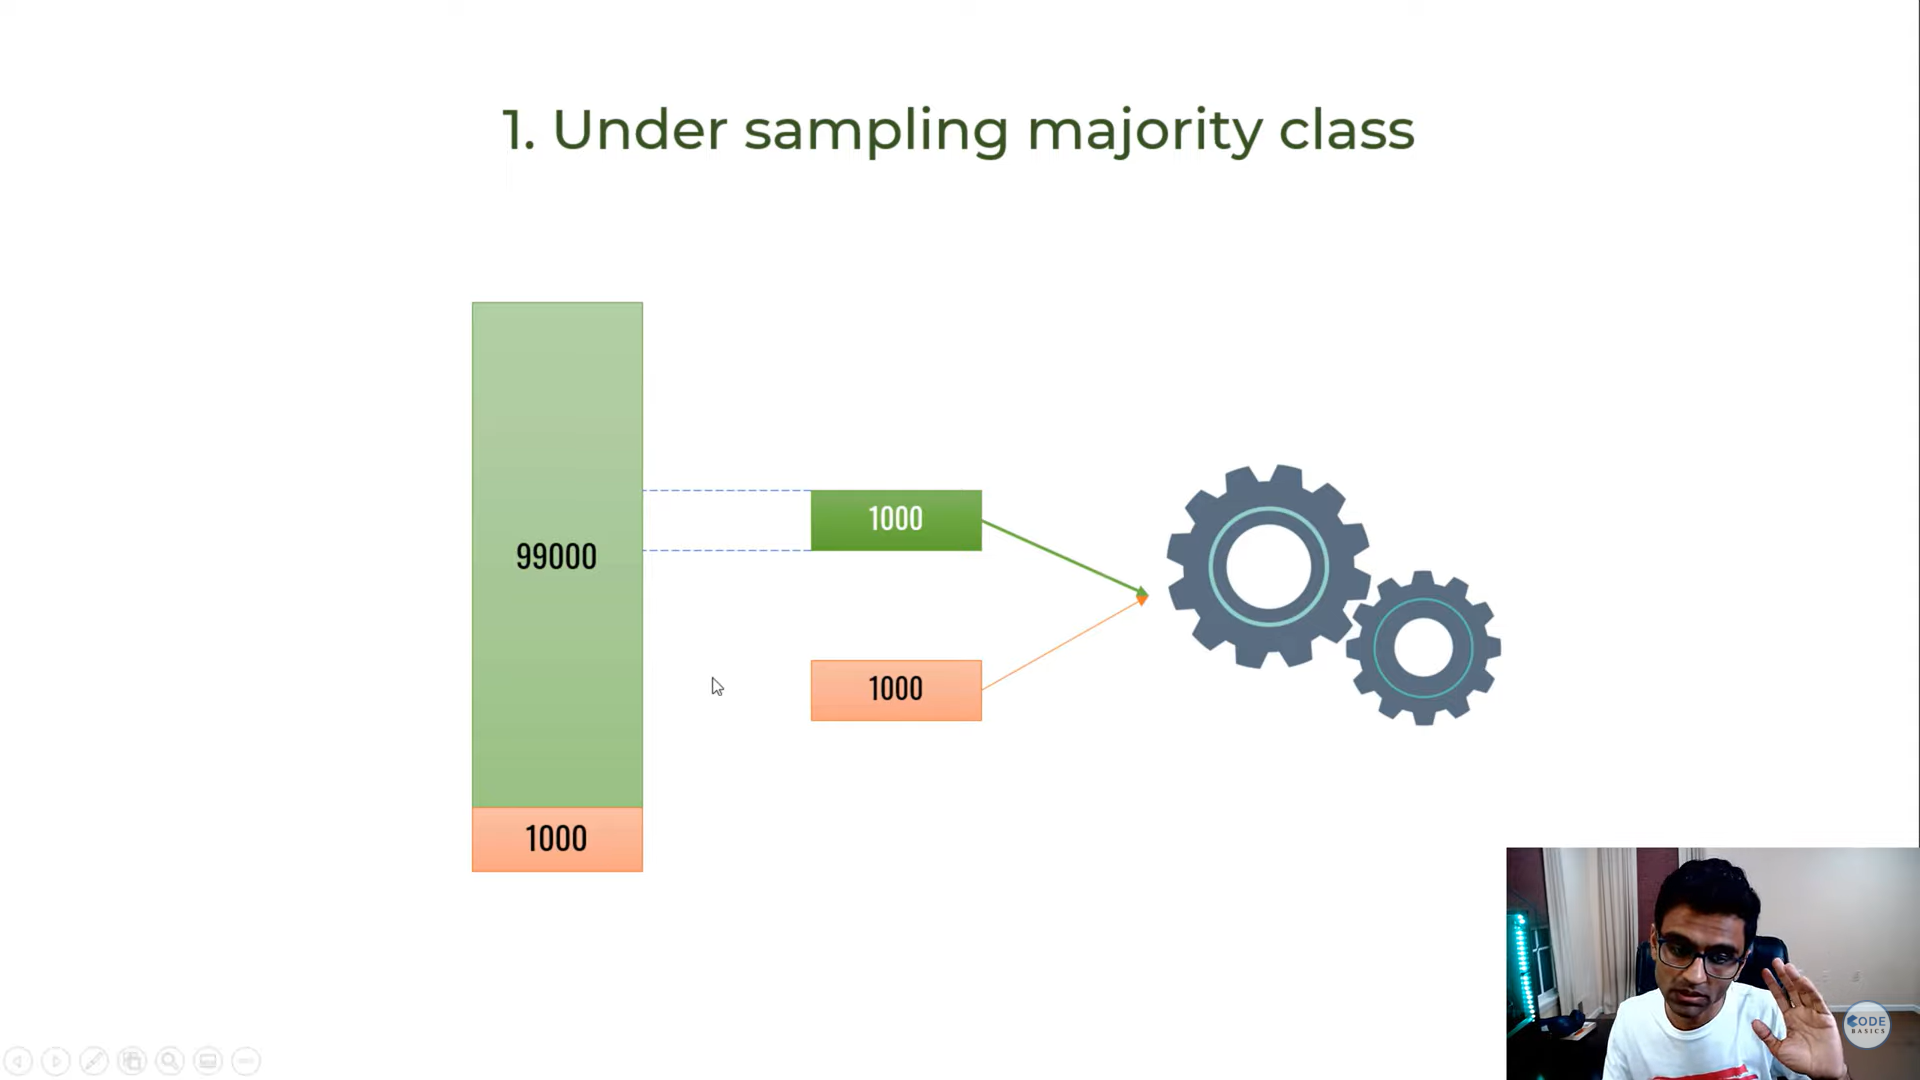

2. Oversampling the Miority class(same least occur vali class ko duplicately lo multiple times)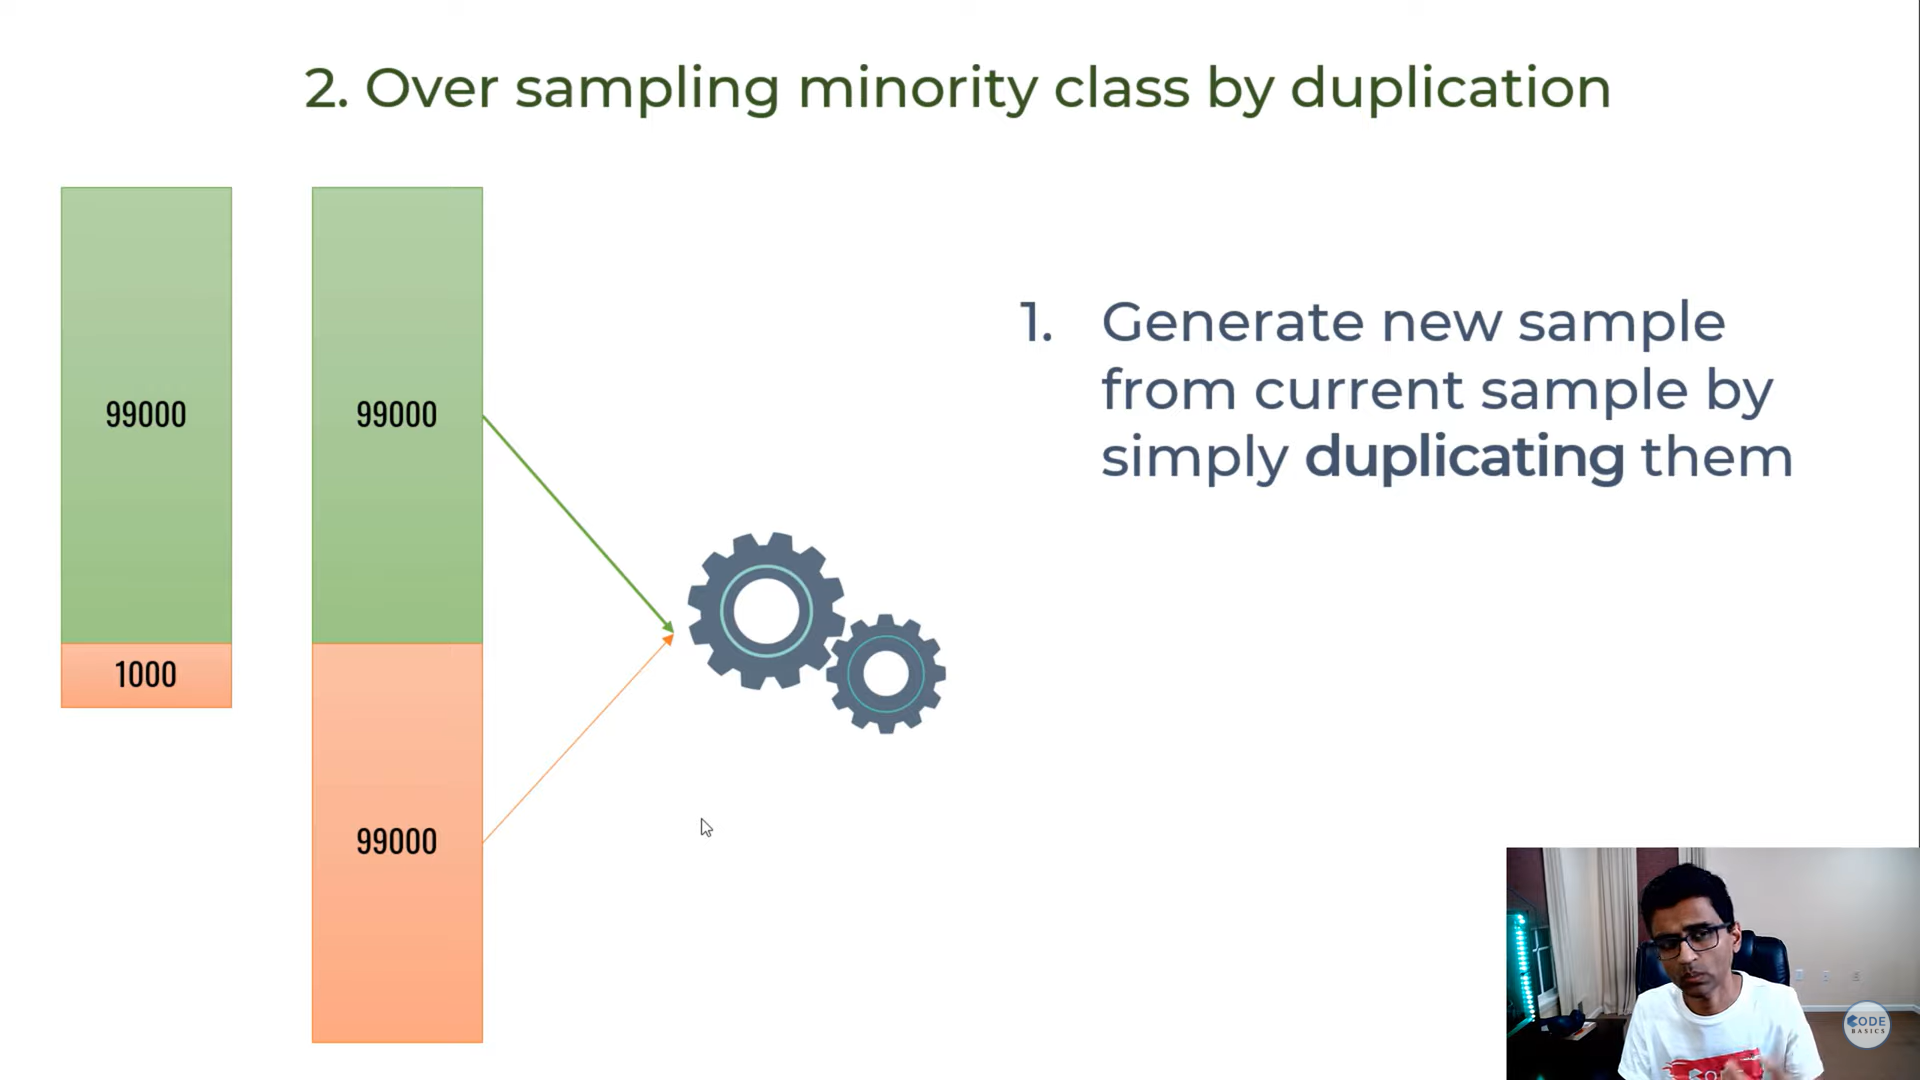



3. Oversampling minority class using SMOTE

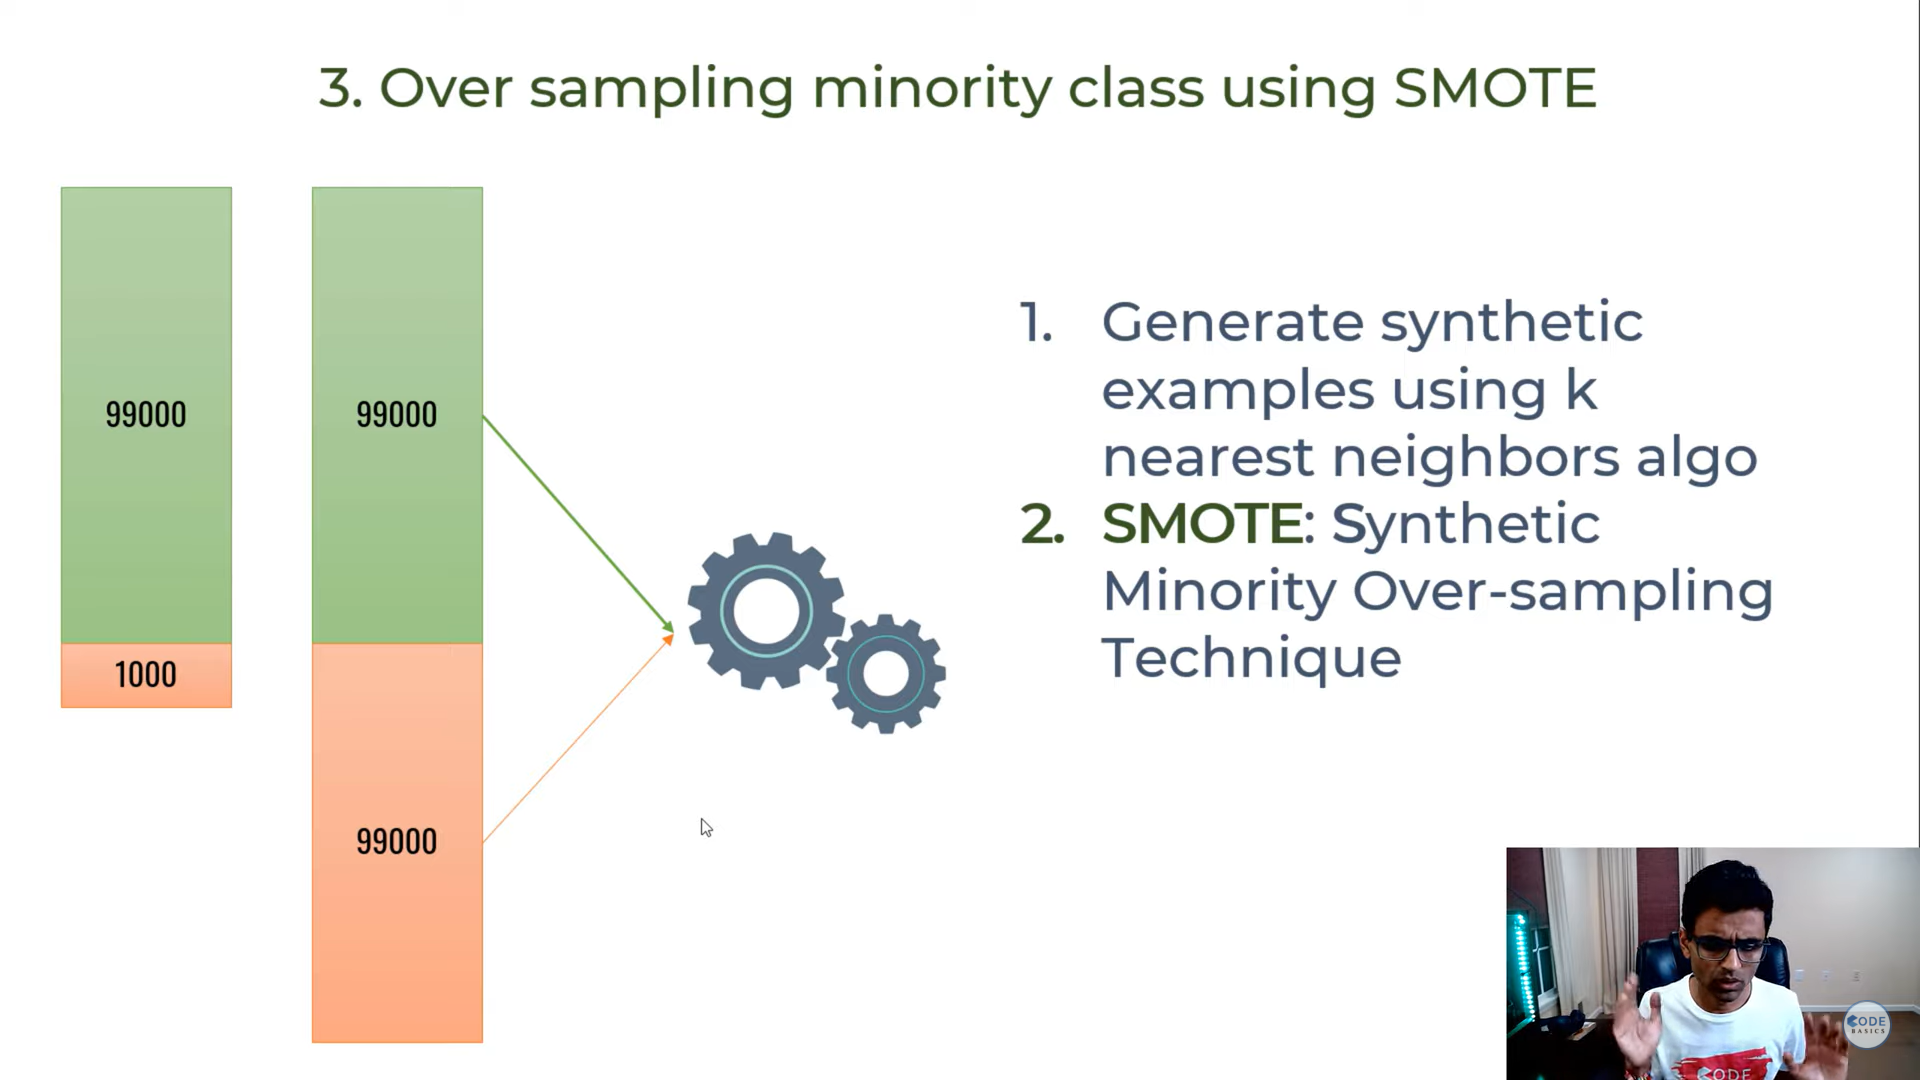

4. Ensamble Method

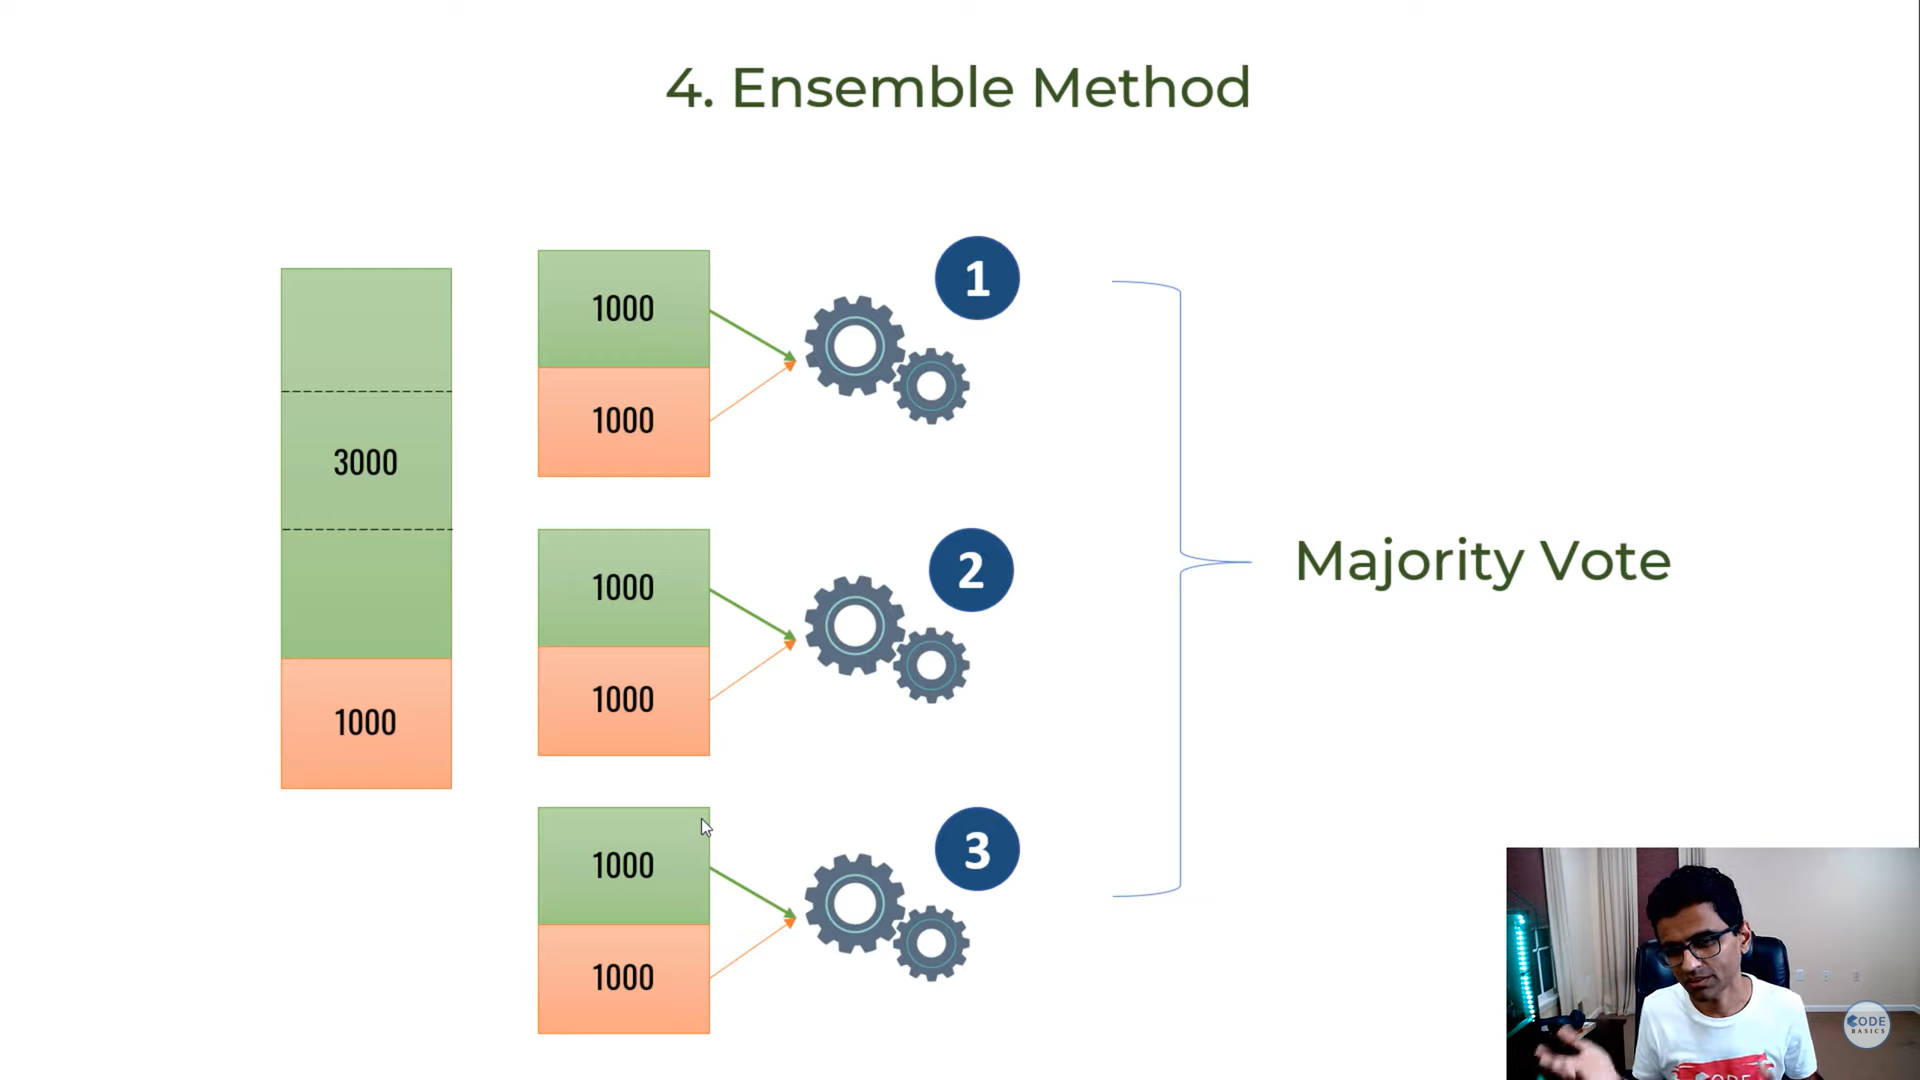

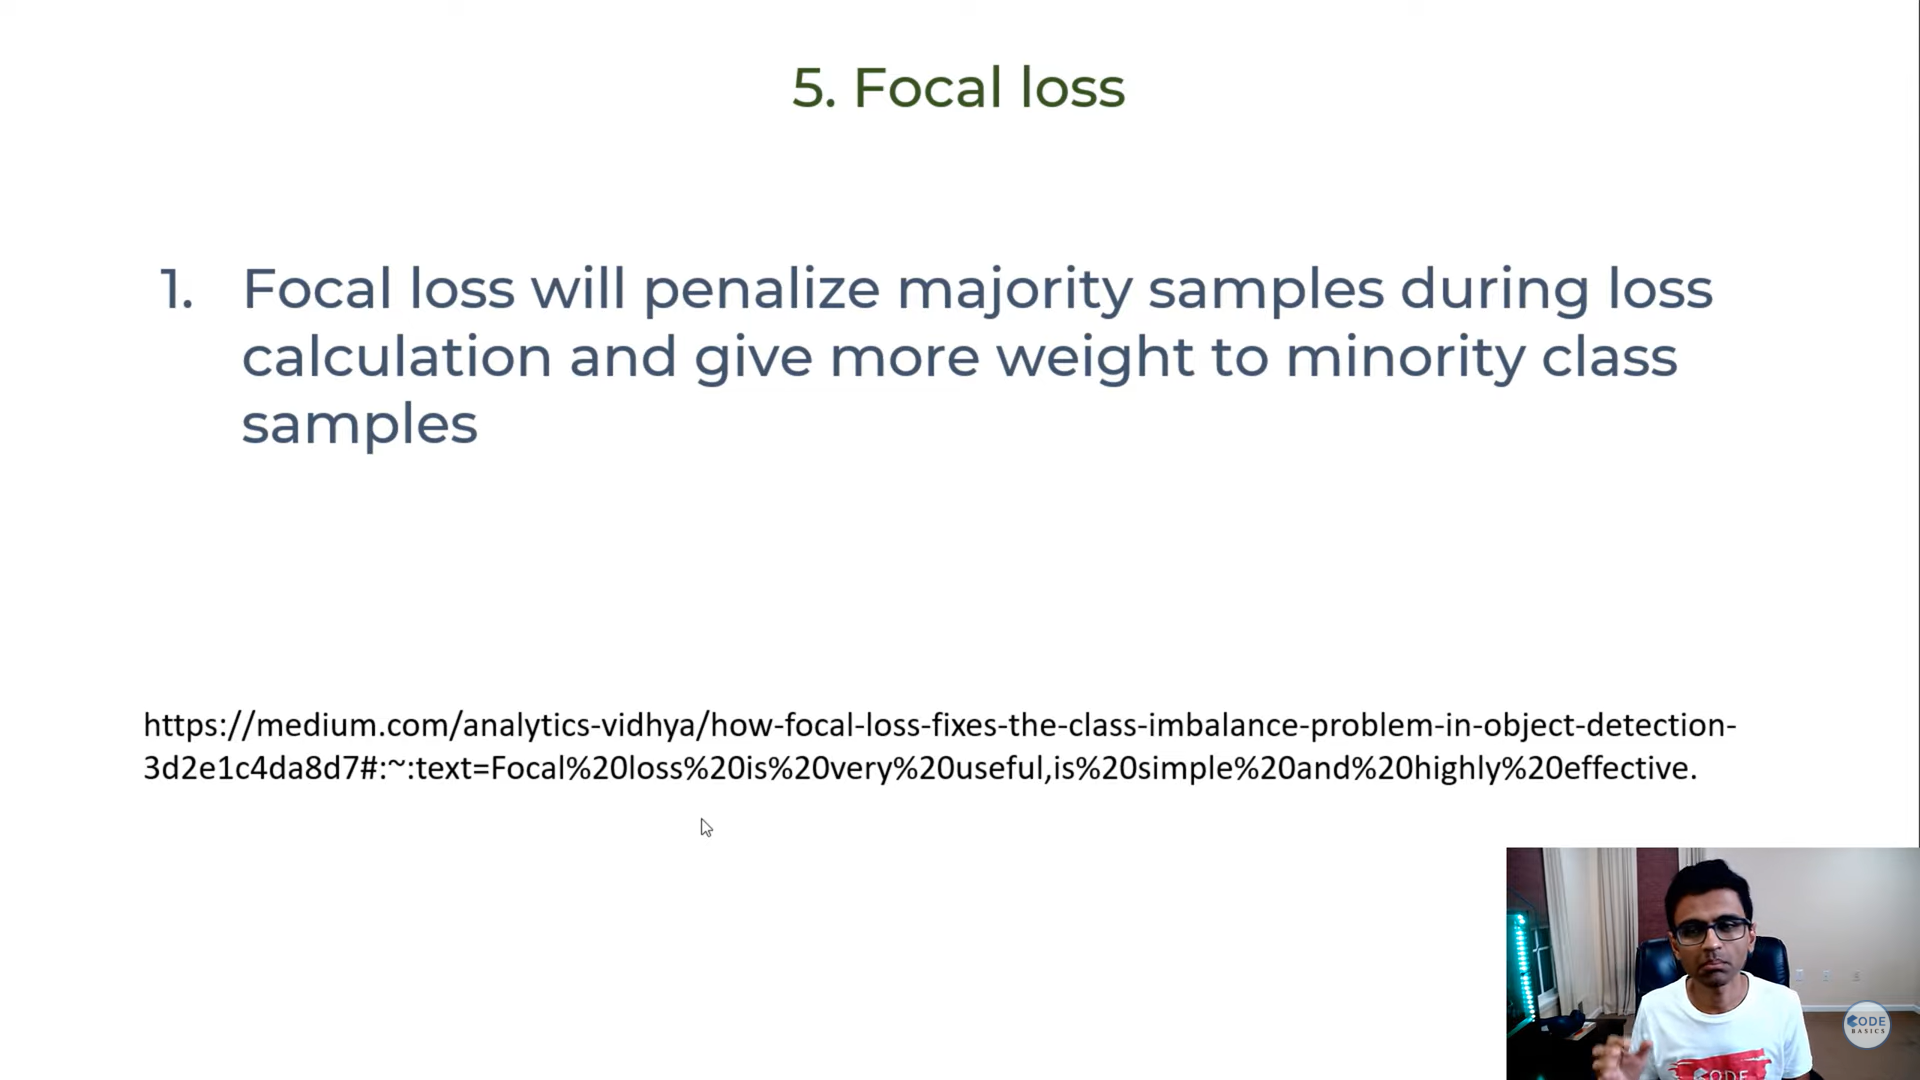

**Examples of imbalanced datasets**

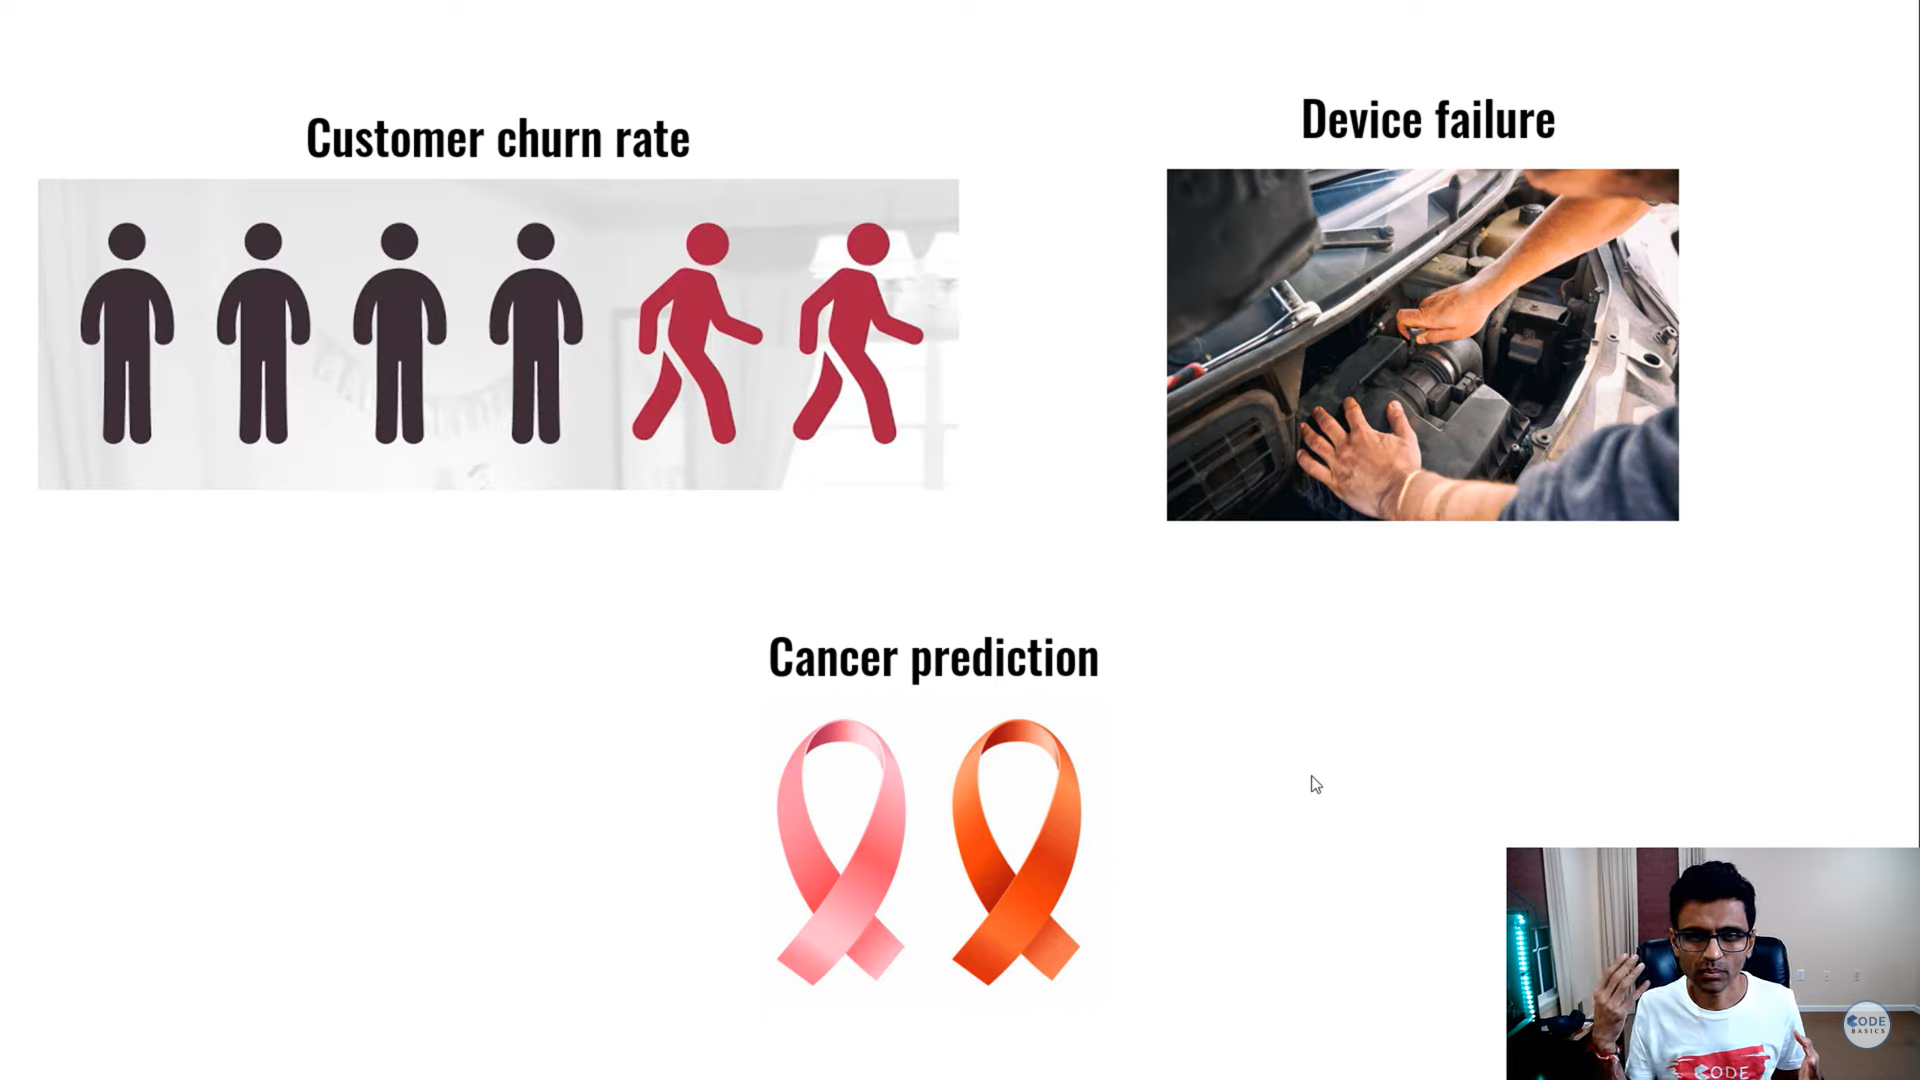

# Using customer churn dataset for the demostration

Accuracy is useless, when your dataset is imbalanced. what matters is f1 score of individual classes. What matters is the f1 score to be higher of the individual classes

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Telco_Customer_Churn.csv")
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1524  1656-DRSMG  Female              0      No         No      63   
2474  5630-IXDXV  Female              0      No         No      47   
5059  6907-NZZIJ  Female              0      No         No      36   
2597  5945-AZYHT    Male              0     Yes         No      71   
6523  2834-JKOOW  Female              0      No         No      15   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
1524          Yes               Yes     Fiber optic             No  ...   
2474          Yes               Yes     Fiber optic             No  ...   
5059          Yes               Yes     Fiber optic             No  ...   
2597          Yes               Yes     Fiber optic            Yes  ...   
6523           No  No phone service             DSL            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
1524              Yes         Yes         Yes             Yes  Month-to-month   
2474              Yes          No         Yes             Yes  Month-to-month   
5059               No          No         Yes             Yes  Month-to-month   
2597              Yes          No         Yes             Yes        One year   
6523              Yes         Yes          No              No        One year   

     PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
1524              Yes  Credit card (automatic)         109.85       7002.95   
2474              Yes         Electronic check         106.35        4849.1   
5059              Yes         Electronic check          99.15        3615.6   
2597              Yes         Electronic check         109.60       7854.15   
6523               No             Mailed check          45.90        693.45   

     Churn  
1524    No  
2474    No  
5059   Yes  
2597    No  
6523    No  

[5 rows x 21 columns]

In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042


First of all, drop customerID column as it is of no use

In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Ahh... it is string. Lets convert it to numbers


In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

Remove rows with space in TotalCharges

In [15]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn=='No']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
3       Male              0      No         No      45           No   
6       Male              0      No        Yes      22          Yes   
7     Female              0      No         No      10           No   
...      ...            ...     ...        ...     ...          ...   
7037  Female              0      No         No      72          Yes   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService       OnlineSecurity  \
0     No phone service             DSL                   No   
1                   No             DSL                  Yes   
3     No phone service             DSL                  Yes   
6                  Yes     Fiber optic                   No   
7     No phone service             DSL                  Yes   
...                ...             ...                  ...   
7037                No              No  No internet service   
7038               Yes             DSL                  Yes   
7039               Yes     Fiber optic                   No   
7040  No phone service             DSL                  Yes   
7042                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
0                     Yes                   No                   No   
1                      No                  Yes                   No   
3                      No                  Yes                  Yes   
6                     Yes                   No                   No   
7                      No                   No                   No   
...                   ...                  ...                  ...   
7037  No internet service  No internet service  No internet service   
7038                   No                  Yes                  Yes   
7039                  Yes                  Yes                   No   
7040                   No                   No                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No        One year   
3                      No                   No        One year   
6                     Yes                   No  Month-to-month   
7                      No                   No  Month-to-month   
...                   ...                  ...             ...   
7037  No internet service  No internet service        Two year   
7038                  Yes                  Yes        One year   
7039                  Yes                  Yes        One year   
7040                   No                   No  Month-to-month   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
3                  No  Bank transfer (automatic)           42.30   
6                 Yes    Credit card (automatic)           89.10   
7                  No               Mailed check           29.75   
...               ...                        ...             ...   
7037              Yes  Bank transfer (automatic)           21.15   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
70

Data Visualization

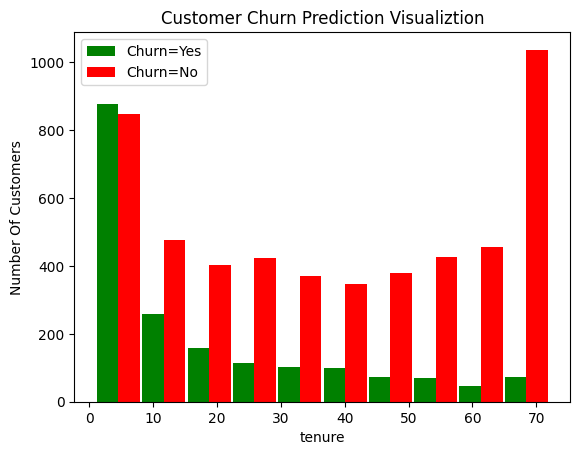

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

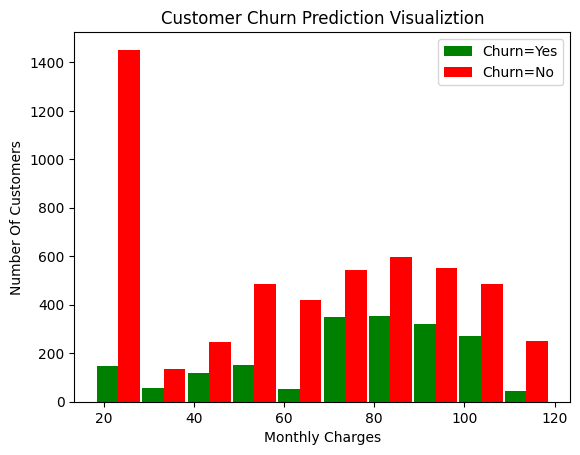

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Convert Yes and No to 1 or 0

In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [29]:
df1.gender.unique()

array([1, 0])

One hot encoding for categorical columns

In [30]:

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df2.sample(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
3912       1              0        1           1      60             1   
195        1              0        1           0      20             1   
4064       1              0        0           0       1             1   
6557       1              0        0           0      33             1   
6535       0              0        0           0      35             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
3912              1               1             1                 1  ...   
195               0               1             1                 0  ...   
4064              0               1             0                 0  ...   
6557              1               0             1                 0  ...   
6535              0               0             1                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
3912                    0                            1                   0   
195                     0                            1                   0   
4064                    1                            0                   0   
6557                    0                            1                   0   
6535                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
3912                        0                  0                  1   
195                         1                  0                  0   
4064                        1                  0                  0   
6557                        1                  0                  0   
6535                        0                  1                  0   

      PaymentMethod_Bank transfer (automatic)  \
3912                                        0   
195                                         0   
4064                                        0   
6557                                        0   
6535                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
3912                                      1                               0   
195                                       0                               1   
4064                                      0                               1   
6557                                      0                               1   
6535                                      0                               0   

      PaymentMethod_Mailed check  
3912                           0  
195                            0  
4064                           0  
6557                           0  
6535                           0  

[5 rows x 27 columns]

In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Train test split

In [46]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

# ohh got imbalanced dataset , 1:3 binary_category me division

In [37]:
y.value_counts() # this is in total y

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [38]:
5163/1869

2.7624398073836276

In [39]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [40]:
1033/374

2.7620320855614975

**Build a model (ANN) in tensorflow/keras**

In [41]:
from tensorflow_addons import losses

ModuleNotFoundError: ignored

In [42]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.5 MB/s eta 0:00:00


In [43]:
from tensorflow_addons import losses

In [44]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

Let's define the neural network inside a function to reuse it multiple times

In [45]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):

  model = keras.Sequential([
      keras.layers.Dense(26,input_dim=26,activation='relu'),
      keras.layers.Dense(15,activation='relu'),
      keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])

  if weights == -1:
    model.fit(x_train, y_train, epochs=100) # by default class_weights = None
  else:
    model.fit(x_train, y_train, epochs=100, class_weights = weights) # used in case of imbalanced dataset. Gives high weight to minority class, and low weight to majority class

  print(model.evaluate(x_test,y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n",classification_report(y_test,y_preds))

  return y_preds

 if weights == -1:
    model.fit(x_train, y_train, epochs=100)

  else:
    model.fit(x_train, y_train, epochs=100, class_weights = weights)

In these lines of code, there's a condition based on the value of `weights`. The `class_weight` parameter is used during the training of a neural network. Let me break down the significance:

1. **If `weights` equals -1:**
   - The model is trained without using class weights (`class_weight=None`).
   - This means that all classes are treated equally during training, and the model aims to minimize a standard loss function.

2. **If `weights` is not equal to -1:**
   - The model is trained with class weights.
   - Class weights are used to give different weights to different classes during training. This is useful when dealing with imbalanced datasets, where some classes have fewer samples than others.
   - The `class_weight` parameter assigns a weight for each class. Higher weights are given to underrepresented classes, and lower weights to overrepresented classes.
   - By setting `class_weight=weights`, you are specifying the weights to be used during training.

The purpose of using class weights is to address the issue of imbalanced datasets. If one class has significantly fewer samples than the others, the model may be biased towards the majority class. Class weights help the model to pay more attention to the minority class during training.

In summary, these lines of code allow you to control whether or not class weights are applied during training, and if applied, you can provide specific weights using the `weights` parameter.

In [47]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5229 - accuracy: 0.7259
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.7808
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.7902
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.7932
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8000
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8005
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4133 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8028
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4081 - accura

**Mitigating Skewdness of Data**

**Method 1: Undersampling**

In [53]:
df2['Churn'].value_counts() # this is exact same as : df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [49]:
# class count

count_class_0 ,  count_class_1 = df1.Churn.value_counts()

# divide by class

df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [52]:
# undersample 0-class and concat the DataFrames of both the class

df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0) # row wise concat

print("Random Under Sampling:")
print(df_test_under.Churn.value_counts())

Random Under Sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [55]:
X = df_test_under.drop('Churn',axis='columns')
Y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(X,Y,test_size=0.2,random_state=15,stratify=Y)
# first time stratify use kiya, since dataframe me distribution was not random. Sare class 1 ek sath, and sare class 2 ek sath hai.
# so stratify krne se equal proportion me classes ka split hota hai

In [57]:

# Number of classes in training Data

y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [58]:
y_preds = ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.5971 - accuracy: 0.7187
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.7669
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4909 - accuracy: 0.7712
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7709
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4810 - accuracy: 0.7759
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7773
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7749
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7769
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7756
Epoch 11/

for class 1(minority class), this time precision, recall and f1-score had improved(increased) wrt imbalanced dataset. Yes, precision, recall, f1-score of class-0(initially majority class) had decreased wrt imbalanced one

**Method 2 : Oversampling**

In [59]:
count_class_0, count_class_1

(5163, 1869)

In [60]:
df_class_1.shape

(1869, 27)

In [61]:
df_class_1.sample(200).shape

(200, 27)

In [62]:
df_class_1.sample(2000).shape
# Cannot take a larger sample than population when 'replace=False' : duplicates not allowed at this time when replace=False

ValueError: ignored

In [63]:
df_class_1.sample(2000,replace=True).shape # now successfully increased. Picked 2000 random samples, repetiotion is allowed

(2000, 27)

In [64]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True) # since 1 is less, we want class 1 to become equal to class 0
df_class_1_over.shape

(5163, 27)

In [66]:
df_test_over = pd.concat([df_class_0, df_class_1_over],axis = 0)
df_test_over.shape

print('Random Over Sampling')
print(df_test_over.Churn.value_counts())

Random Over Sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [67]:
X = df_test_over.drop('Churn',axis='columns')
Y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=Y)

In [68]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [69]:
# loss = keras.losses.BinaryCrossentropy()
# weights = -1
y_preds = ANN(x_train, y_train, x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 4s 4ms/step - loss: 0.5347 - accuracy: 0.7393
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4965 - accuracy: 0.7597
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.7604
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.7639
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4843 - accuracy: 0.7640
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4805 - accuracy: 0.7639
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.7657
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7697
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7708
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4705 - accura

Accuracy overall will remain the same.

Now almost same precision, recall, f1-score for both the classes. And class 0 me decrease na hokar, only class 1 me increase hua(ye sbhi 3 parameters)

**METHOD 3 : SMOTE** : interpolation between two chosen instances to generate k more synthatic random samples by interpolation

It is better than method2 : oversampling, as it does not uses the same sample again and again, it does interpolation between already known samples and generates new samples for minority class in this way

Yes, that's correct. SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique that generates synthetic samples for the minority class by interpolating between existing minority class samples. This can be more effective than simply duplicating existing samples (which is what happens in basic oversampling), as it introduces diversity and helps to avoid overfitting to the existing minority class instances.

SMOTE is particularly useful in addressing class imbalance in datasets, where the number of instances in one class is significantly lower than the other. It helps to balance the class distribution, making machine learning models more robust and improving their performance, especially on the minority class.

In [70]:
X = df2.drop('Churn', axis='columns')
Y = df2['Churn']

In [71]:
!pip install imbalanced-learn

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority') # smote is a created object of this class
x_sm, y_sm = smote.fit_resample(X,Y) # it is .fit_reshaple now, instead of fit_sample()

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

SMOTE (Synthetic Minority Over-sampling Technique) is a method for handling imbalanced datasets, particularly in the context of classification problems where the distribution of classes is uneven. The goal of SMOTE is to balance the class distribution by generating synthetic examples of the minority class.

Here's how SMOTE works:

1. **Identify the Minority Class:**
   - In an imbalanced dataset, there is typically a minority class (underrepresented) and a majority class (overrepresented).

2. **Select a Minority Instance:**
   - Randomly choose an instance from the minority class.

3. **Find Nearest Neighbors:**
   - Identify the k-nearest neighbors for the chosen instance within the minority class. The number of neighbors, denoted by `k`, is a parameter of the SMOTE algorithm.

4. **Generate Synthetic Examples:**
   - For each neighbor, create synthetic examples by interpolating between the chosen instance and its neighbors.
   - This is done by choosing a random value between 0 and 1 for each feature and combining it with the values of the chosen instance and its neighbor.

5. **Repeat:**
   - Repeat the process until the desired balance between the minority and majority classes is achieved.

SMOTE effectively increases the number of instances in the minority class by creating synthetic samples, making the distribution more balanced. This helps prevent the model from being biased towards the majority class and can improve the performance of machine learning models, especially in situations where the minority class is important.

It's important to note that while SMOTE can be a powerful tool for handling class imbalance, its effectiveness depends on the characteristics of the dataset and the specific problem. Additionally, it should be used cautiously, and its impact on the overall performance of the model should be evaluated through proper validation procedures.

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state=15, stratify=y_sm)

In [76]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [77]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [79]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 5s 4ms/step - loss: 0.5188 - accuracy: 0.7447
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4685 - accuracy: 0.7782
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4608 - accuracy: 0.7817
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4539 - accuracy: 0.7834
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7896
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4437 - accuracy: 0.7909
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4386 - accuracy: 0.7956
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4351 - accuracy: 0.7973
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8019
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4276 - accura

Hurrah better improvement in each parameters of minority class

**Method 4 : Use of eneamble with Undersampling**


Ensemble undersampling techniques are methods that involve creating multiple subsets of the majority class and combining them with the entire minority class to form a balanced dataset. The goal is to address class imbalance by reducing the number of instances in the majority class, thereby preventing the model from being biased toward the majority class. One common ensemble undersampling techniques is:

**EasyEnsemble:**

Idea: EasyEnsemble creates multiple subsets (ensembles) of the majority class, each containing a randomly selected subset of instances from the majority class along with the entire minority class.

Process:

* Randomly select a subset of instances from the majority class (without replacement).
* Combine this subset with the entire minority class to create a balanced ensemble.
* Repeat this process to create multiple ensembles.
* Train a classifier on each ensemble.
* Combine the predictions of individual classifiers to make a final prediction.

In [80]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [81]:
X = df2.drop('Churn',axis = 'columns')
Y = df2['Churn']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15, stratify=y)

In [83]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [84]:
4130/1495
# almost 3 times , so class 0 should be divides into 3 parts

2.762541806020067

In [85]:
4130/3

1376.6666666666667

In [86]:
df3 = x_train.copy()
df3['Churn']=y_train

In [87]:
df3.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
684        1              0        0           0  0.000000             1   
2446       1              0        0           0  0.239437             1   
1680       0              0        1           1  0.774648             1   
2220       0              0        1           0  1.000000             1   
2842       1              0        0           0  0.042254             0   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
684               0               0             0                 0  ...   
2446              1               0             1                 0  ...   
1680              1               0             0                 0  ...   
2220              0               1             1                 0  ...   
2842              0               1             0                 1  ...   

      InternetService_Fiber optic  InternetService_No  \
684                             1                   0   
2446                            1                   0   
1680                            0                   1   
2220                            0                   0   
2842                            0                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
684                         1                  0                  0   
2446                        1                  0                  0   
1680                        0                  1                  0   
2220                        0                  0                  1   
2842                        1                  0                  0   

      PaymentMethod_Bank transfer (automatic)  \
684                                         0   
2446                                        0   
1680                                        0   
2220                                        1   
2842                                        0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
684                                       0                               0   
2446                                      1                               0   
1680                                      0                               0   
2220                                      0                               0   
2842                                      0                               0   

      PaymentMethod_Mailed check  Churn  
684                            1      0  
2446                           0      1  
1680                           1      0  
2220                           0      0  
2842                           1      0  

[5 rows x 27 columns]

In [88]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [90]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [91]:
df_train = pd.concat([df3_class0[0:1495],df3_class1],axis=0) # majority ke pahle 1495 eselect ho gye 0 to 1494 index vale
df_train.shape

(2990, 27)

In [93]:
# since we need to do the above tast three times, let's create it in a function

def get_train_batch(df_majority,df_minority,start,end):

  df_train = pd.concat([df_majority[start:end], df_minority], axis = 0) # instead of selecting random 1495 numbers, we are selecting the continuous majority samples, as usme all churn = 0 vale hi hain. Ek tarah se unhe random hi bol skte hain, as we don't know kon sa khan hai

  x_train = df_train.drop('Churn',axis = 'columns')
  y_train = df_train.Churn

  return x_train, y_train

In [94]:
x_train , y_train = get_train_batch(df3_class0, df3_class1, 0,1495)

x_train.shape

(2990, 26)

In [95]:
y_pred_1 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6801 - accuracy: 0.5565
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5916 - accuracy: 0.7348
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7545
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4909 - accuracy: 0.7656
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4890 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4852 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4849 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7679
Epoch 11/

In [96]:
x_train , y_train = get_train_batch(df3_class0, df3_class1, 1495,2990)

y_pred_2 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.5934 - accuracy: 0.6980
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5082 - accuracy: 0.7582
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4863 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4835 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4829 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.7666
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4730 - accuracy: 0.7649
Epoch 11/

In [97]:
x_train , y_train = get_train_batch(df3_class0, df3_class1, 2990,4130)

y_pred_3 = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 4s 7ms/step - loss: 0.6098 - accuracy: 0.6956
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7594
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7670
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7734
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7700
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4711 - accuracy: 0.7818
Epoch 7/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7780
Epoch 8/100
83/83 [==============================] - 0s 6ms/step - loss: 0.4684 - accuracy: 0.7780
Epoch 9/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4649 - accuracy: 0.7765
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7772
Epoch 11/

For predictions, we don't look for individual models. Neighter the one with highest accuracy.

We take final prediction as the majority vote of all the models. matlb , 3 me se 2 models predition class '0' bol rhe, keval ek class '1', bol rha toh, we will consider the final prediction as class 0

In [99]:
vote1 = 0
vote2 = 0
vote3 = 1
vote1+vote2+vote3

1

In [100]:
vote1 = 0
vote2 = 1
vote3 = 1
vote1+vote2+vote3

2

In [101]:
vote1 = 1
vote2 = 1
vote3 = 1
vote1+vote2+vote3

3

So for this case, anything greater than 1 is 1

In [102]:
len(y_pred_1)

1407

In [103]:
len(y_pred_2)

1407

In [104]:
len(y_pred_3)

1407

Final Prediction is nothing but the majority vote

In [105]:
y_pred_final = y_pred_1.copy() # abhi ese bna do, baki neeche for loop me values me change hoga and actual values se replacement ho jayega

for i in range(len(y_pred_1)):
  n_ones = y_pred_1[i] + y_pred_2[i] + y_pred_3[i]
  if n_ones > 1 :
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

In [106]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.66      0.76      1033
           1       0.46      0.82      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407



f1-score for minority class 1 improved to 0.59 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes

Machine learning is all about hit and trial. You have to check all, and then conclude which one is the best for your model